In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('drugsComTrain_raw.csv')

In [65]:
test = pd.read_csv('drugsComTest_raw.csv')

# 1

## 1.1

In [66]:
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [67]:
train.shape

(161297, 7)

In [68]:
train.isnull().sum()

,0
uniqueID,0
drugName,0
condition,899
review,0
rating,0
date,0
usefulCount,0


<Axes: >

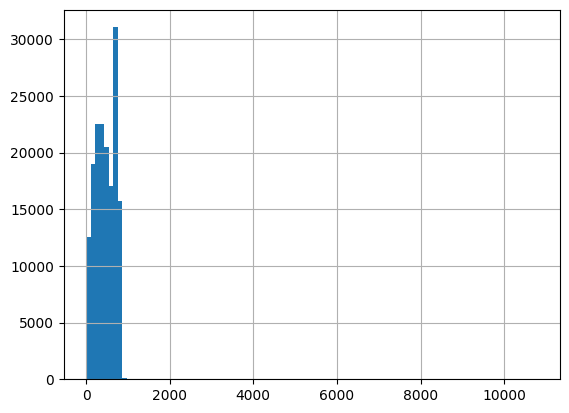

In [69]:
train['review'].apply(len).hist(bins=100)

In [74]:
train['review'].apply(len).min()

3

In [75]:
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [76]:
test.shape

(53766, 7)

In [77]:
test.isnull().sum()

,0
uniqueID,0
drugName,0
condition,295
review,0
rating,0
date,0
usefulCount,0


<Axes: >

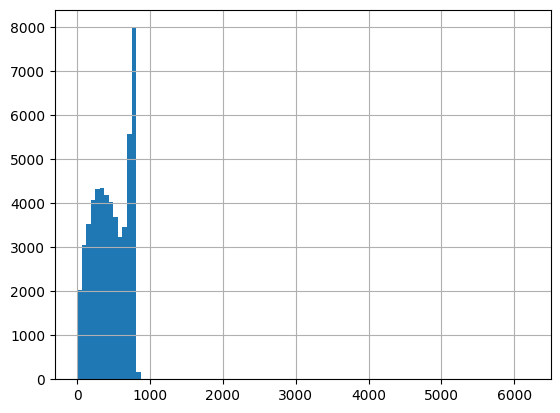

In [78]:
test['review'].apply(len).hist(bins=100)

## 1.2

Considera la colonna condition, quanti sono i possibili valori di questa feature? Visualizza in un istogramma la distribuzione dei 10 valori più frequenti per entrambi i dataset.

In [79]:
train['condition'].nunique()

884

In [80]:
test['condition'].nunique()

708

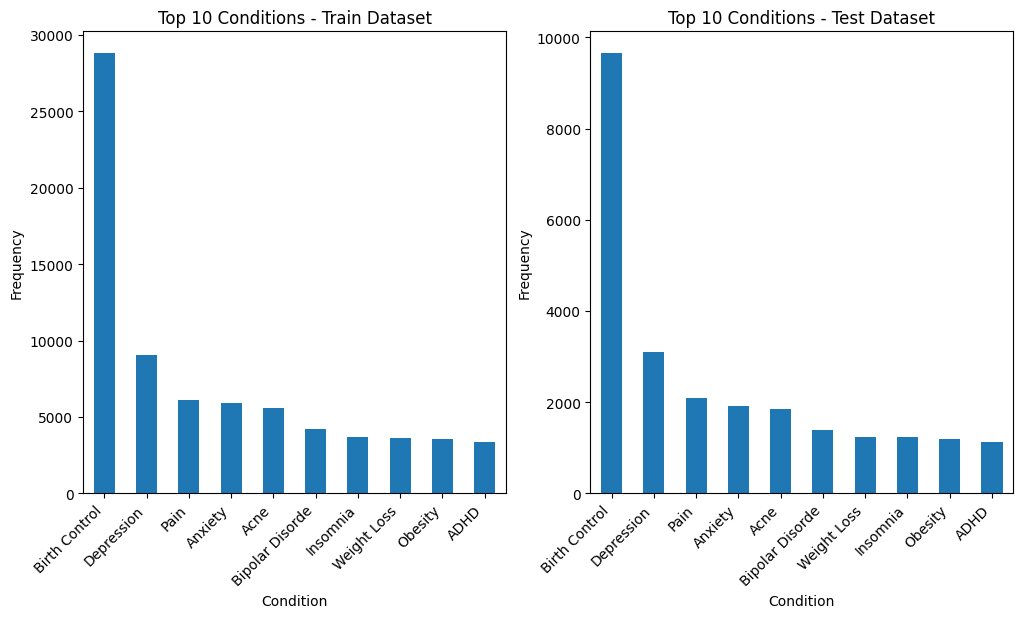

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
train['condition'].value_counts()[:10].plot(kind='bar')
plt.title('Top 10 Conditions - Train Dataset')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')


plt.subplot(1, 2, 2)
test['condition'].value_counts()[:10].plot(kind='bar')
plt.title('Top 10 Conditions - Test Dataset')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.show()

## 1.3

Considerando le 100 recensioni con il valore di utilità più alto, calcolare il punteggio medio per condizione del paziente. Cosa si può osservare da questi dati? Si nota una differenza tra i due dataset?

In [82]:
top_useful_train = train.sort_values(by='usefulCount', ascending=False)[:100]

In [83]:
top_useful_train.groupby('condition')['rating'].mean().sort_values(ascending=False)

,rating
condition,
Muscle Spasm,10.000000
Obesity,10.000000
Panic Disorde,10.000000
Polycystic Ovary Syndrome,10.000000
Urinary Tract Infection,10.000000
emale Infertility,10.000000
Anxiety,9.923077
Pain,9.777778
Weight Loss,9.600000


In [84]:
top_useful_test = test.sort_values(by='usefulCount', ascending=False)[:100]

In [85]:
top_useful_test.groupby('condition')['rating'].mean().sort_values(ascending=False)

,rating
condition,
ADHD,10.000000
Obesity,10.000000
Urinary Tract Infection,10.000000
Underactive Thyroid,10.000000
Panic Disorde,10.000000
Ovulation Induction,10.000000
Opiate Withdrawal,10.000000
Obsessive Compulsive Disorde,10.000000
Weight Loss,10.000000


# 2

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor

## 2.1

A partire dal dataset originale, eliminare eventuali attributi inutili (giustificare la scelta), eliminare eventuali istanze che contengono valori nulli.

In [ ]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [ ]:
train.shape[0], train['drugName'].nunique(), test.shape[0], test['drugName'].nunique()

In [ ]:
train.drop(['uniqueID', 'date'], axis=1, inplace=True)
test.drop(['uniqueID', 'date'], axis=1, inplace=True)

In [ ]:
X_train, X_test, Y_train, Y_test = train.drop('rating', axis=1), test.drop('rating', axis=1), train['rating'], test['rating']

## 2.2

Creare una pipeline in cui:

- i valori di drugName e condition sono trasformati con un label encoder,

- il testo delle recensioni è trasformato utilizzando TfidfVectorizer,

- i valori di usefulCount sono scalati con MinMaxScaler(0,1),

- viene applicato il modello LinearRegression.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def remove_line_break(text):
    # Removes all line breaks
    for sign in '\r\n':
        text = text.replace(sign, " ")
    return text

In [ ]:


coltran = ColumnTransformer(transformers=[("tfidf", TfidfVectorizer(stop_words='english', max_features=5000, preprocessor=remove_line_break), 'review'),
                                          ("label", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ["drugName", "condition"]),
                                          ("minmax", MinMaxScaler(), ["usefulCount"])],
                                 remainder='passthrough')

pipeline = Pipeline(steps=[("coltran", coltran),
                           ("estimator", LinearRegression())
                           ])

pipeline.fit(X_train, Y_train)

In [ ]:
Y_pred = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(Y_test, Y_pred.round())

## 2.3

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'coltran__tfidf__analyzer': ['word', 'char'],
    'coltran__tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
}

gd = GridSearchCV(pipeline, parameters, scoring='neg_mean_absolute_error')
gd.fit(X_train, Y_train)
gd.best_params_

# {'coltran__tfidf__analyzer': 'word', 'coltran__tfidf__ngram_range': (1, 2)}

In [ ]:
gd.best_score_